In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch,Rectangle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d

plt.rcParams["figure.figsize"] = [10, 10]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt

from scipy.integrate import quad,dblquad

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


## Announcements

  - No quiz this week.
    - But **do** attend recitation
    - This stuff isn't easy.
  - Homework 10 due **Tuesday**.
  - Exam 2
    - Stronger results (as predicted)
    - Scores released today or tomorrow at latest.
    - See me about 11/14 deadline if concerned.

    
    

# One-minute Review

A bee flies around a room. $$\vec r(t) = x(t)\,\vec i + y(t)\,\vec j + z(t)\, \vec k$$

There is varying temperature in the room. $$T(x,y,z)$$

The bee heads toward the warm parts.

$$\vec r'(t) = \nabla T.$$

But there is wind from the HVAC unit...
  

# Lecture 18

  - Objectives
    - Vector Fields
      - examples, plots
      - examples from physics
    - Conservative vector fields and potentials
  - Resources
    - Content
      - Stewart: §16.1–2
      - New Strang:  
        - [§6.1](https://ximera.osu.edu/mooculus/calculus3/vectorFields/digInVectorFields)
      - [Slides](https://hub.columbiajupyter2.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fdrewyoungren%2Fmvc-f19&urlpath=tree%2Fmvc-f19%2Fslides%2Fmvc-L18.ipynb) via JupyterHub
    - Practice
      - Mooculus: [Vector Fields](https://ximera.osu.edu/mooculus/calculus3/vectorFields/digInVectorFields)
    - Extras
      - CalcBLUE: [Fields](https://www.youtube.com/watch?v=GmPN18JDtEI&t=0s&list=PL8erL0pXF3JYCn8Xukv0DqVIXtXJbOqdo&index=2) 

# Vector $\vec F$ields

A vector field $\vec F:\RR^n \to \RR^n$ is a function whose inputs are the points of $\RR^n$, often interpreted as vectors, and whose outputs are also vectors. For instance,

$$\vec F(x,y) =  -y\,\vec i +  x\,\vec j $$

is an important vector field in the plane. 

All our vector operations apply to these fields. So, in this case, for example,

$$\vec x \cdot \vec f(\vec x) = \langle x,y \rangle \cdot \vec F(x,y) = -xy + xy = 0.$$

So what does this vector fiels "look like"?

## Vector Plots

We take a selection of input points (usually at regular intervals) and plot their outputs at the particular point, often scaling to make the plot readable.

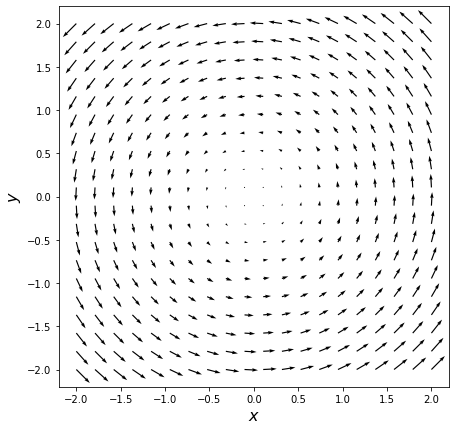

In [16]:
x = y = np.linspace(-2,2,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,-y,x);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)

## Vector Plots

Contrast this with the **radial vector field** $$\vec G(x,y) = x\,\vec i + y\,\vec j$$

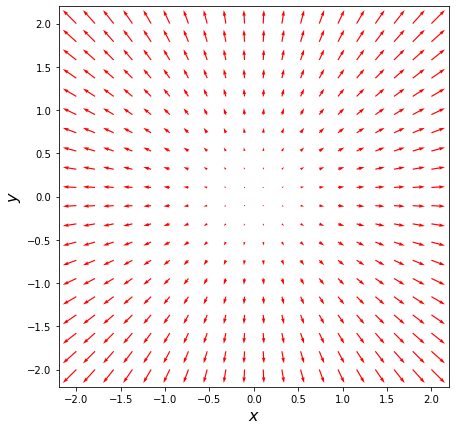

In [17]:
x = y = np.linspace(-2,2,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
# plt.quiver(x,y,-y,x);
plt.quiver(x,y,x,y,color='r');
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)

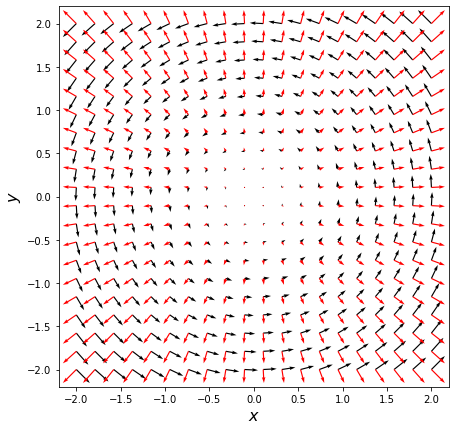

In [15]:
x = y = np.linspace(-2,2,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,-y,x);
plt.quiver(x,y,x,y,color='r');
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)

#### Quick exercise

What is the vector field of unit vectors pointing at the origin?

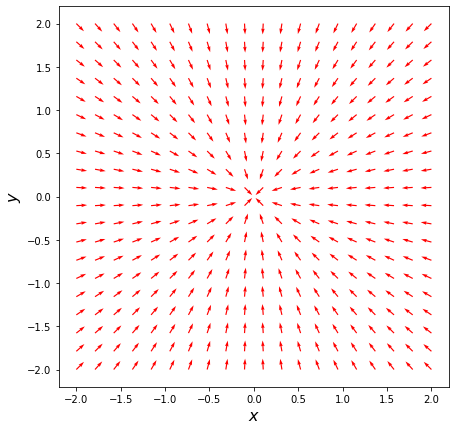

In [19]:
x = y = np.linspace(-2,2,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,-x/sqrt(x**2 + y**2),-y/sqrt(x**2 + y**2),color='r');
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)

## Exercise

Match the vector plot with the correct expression.

$$ \vec G(x,y) = \ln(1+y^2)\vec i + \ln(1+y^2)\,\vec j \qquad \vec H(x,y) = \vec i + \sin x\,\vec j$$ 
$$ \vec J(x,y) =  \vec i + \sin y\,\vec j \qquad \vec K(x,y) = y\,\vec i + \frac1x\,\vec j$$ 


![2D Vector field examples](vfield-mc.png)

##### Answers

$$A\to \vec J \qquad B \to \vec K \qquad C \to \vec H \qquad D \to \vec G$$

## 3D Vector Fields

Vector fields in 3 dimensions are no more complicated in theory, but their plots can be a bit unwieldly. 

Below are the plots for 
\begin{align*}
 \vec F(x,y,z) &=  x\,\vec i \\
 \vec G(x,y,z) &=  -y\,\vec i +  x\,\vec j +  z\,\vec k \\ 
 \vec H(x,y,z) &=  -y\,\vec i +  z\,\vec j +  x\,\vec k \\
\end{align*}

In [34]:
F = lambda x,y,z: np.array([x,0,0])
G = lambda x,y,z: np.array([-y,x,z])
H = lambda x,y,z: np.array([-y,z,x])


@interact(angle=(-108,66,6))
def _(angle=-24,vangle=(0,90,6),func ={"F":F,"G":G,"H":H}):
    fig = plt.figure(figsize=(10,10))
    ax= fig.add_subplot(111,projection='3d')
    u = v = w = np.linspace(-1,1,10)
    U,V,W = np.meshgrid(u,v,w)
    X,Y,Z = func(U,V,W)
    ax.quiver(U,V,W,X,Y,Z,length = .1)
#     ax.plot_surface(X,Y,0*X,rcount=20,ccount=20,color='gray',alpha=.4)
    ax.view_init(vangle,angle)
    
#     ax.plot_wireframe(U,U/2+U*V/2,U,rcount=10,ccount=10)
#     ax.plot_wireframe(U*V,U,U,rcount=10,ccount=10)
#     ax.plot_wireframe(U*V,U/2,U,rcount=10,ccount=10)

#     ax.plot_surface(U,0*X,U+V*(1-U),rcount=20,ccount=20,color='gray',alpha=.4)
#     ax.plot_surface(U*0,U/2+V*(U)/2,U,rcount=20,ccount=20,color='gray',alpha=.4)

    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    

interactive(children=(IntSlider(value=-24, description='angle', max=66, min=-108, step=6), IntSlider(value=42,…

# Physical examples

  - Fluid flow: $\vec F(x,y,z)$ is the velocity of a particle at the point $(x,y,z)$. One could easily imagine this flow depending on a time variable $t$ as well.
  
![Animation of particles flowing in vector field](fluid1.gif)

  - Gravity: A mass $M$ placed at the origin induces the **gravitational field** 
  $$\vec g(x,y,z) = -\frac{GM}{r^2}\frac{\langle x,y,z \rangle}{\sqrt{x^2 +y^2+z^2}}$$ where $r^2 = x^2 + y^2 +z^2$ (distance to the origin, squared). Note the negative sign; this is a field pointing toward the origin with magnitude $GM/r^2$.
  
  The gravitational force on a mass $m$ is thus $m\vec g$. One advantage of this view, is that it is easy to add the gravitational fields for multiple bodies. For example, say a mass is placed at the origina and one twice as big is at position $(1,1,1)$, we can easily observe the resulting gravitational field:

In [94]:
F = lambda x,y,z: -1*np.array([x,y,z])/(sqrt(x**2 + y**2 + z**2)**3)
G = lambda x,y,z: -2*np.array([x-1,y-1,z-1])/(sqrt((x-1)**2 + (y-1)**2 + (z-1)**2)**3)


@interact(angle=(-108,66,6))
def _(angle=-24,vangle=(0,90,6)):
    fig = plt.figure(figsize=(10,10))
    ax= fig.add_subplot(111,projection='3d')
    u = v = w = np.linspace(.1,.9,10)
    U,V,W = np.meshgrid(u,v,w)
    X,Y,Z = F(U,V,W) + G(U,V,W)
    ax.quiver(U,V,W,X,Y,Z,length=.01)
    ax.view_init(vangle,angle)
    ax.scatter([0,1],[0,1],[0,1],color=['b','r'],s=[40,160])
#     ax.scatter?
#     print(X[3,3,3])

    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    

interactive(children=(IntSlider(value=-24, description='angle', max=66, min=-108, step=6), IntSlider(value=42,…

In [78]:
F = lambda x,y: -1*np.array([x,y])/(x**2 + y**2)**(3/2)
G = lambda x,y: -2*np.array([x-1,y-1])/((x-1)**2 + (y-1)**2)**(3/2)
# F = lambda x,y: -1*1e4*np.array([x,y])#/(norm([x,y])**3)
# G = lambda x,y: -2*1e4*np.array([x-1,y-1])#/(norm([x-1,y-1])**3)


@interact(angle=(-108,66,6))
def _(angle=-24,vangle=(0,90,6)):
    fig = plt.figure(figsize=(10,10))
    ax= fig.add_subplot(111)
    u = v = np.arange(-0.125,1.65,.25)
    U,V = np.meshgrid(u,v)
    X,Y = F(U,V) + G(U,V)
    ax.quiver(U,V,X,Y,pivot='middle')
#     ax.view_init(vangle,angle)
    ax.scatter([0,1],[0,1],color=['b','r'],s=[40,160])
#     ax.quiver?
#     print(X[3,3,3])

    for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    

interactive(children=(IntSlider(value=-24, description='angle', max=66, min=-108, step=6), IntSlider(value=42,…

  - Electricity: Like mass, matter can have **charge** $Q$. Unlike mass, $Q$ can have positive or negative values. A charge $Q$ placed at the origin induces the **electric field** 
  $$\vec E(x,y,z) = \frac{Q}{4\pi \varepsilon_0 r^2}\frac{\langle x,y,z \rangle}{\sqrt{x^2 +y^2+z^2}}$$ where again $r^2 = x^2 + y^2 +z^2$ (distance to the origin, squared). Notice how similar this field is in being 1) radial and 2) proportional to $1/r^2$, but also notice the sign is positive. Thus multiplying by a charge $q$ of like sign leads to a repulsive force $q\vec E$ and a $q$ of opposite sign gives an attractive force.

# Conservative Vector Fields

A vector field $\vec F$ is **conservative** if there exists a scalar field $f$ (with the same domain as $\vec F$ such that $$\vec F = \nabla F$$.

The function $f$ is called a **potential**.